<a href="https://colab.research.google.com/github/FatmaZahra26/Data-Augmentation-Project/blob/main/AAPL_paper1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
import yfinance as yf
import pandas as pd

# Download the list of S&P 500 tickers from Wikipedia
sp500_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
sp500_table = pd.read_html(sp500_url)[0]
sp500_tickers = sp500_table['Symbol'].tolist()

# Define the start and end dates for the data
start_date = '2016-01-01'
end_date = '2022-12-31'

#download prices data
data = yf.download(sp500_tickers, start=start_date, end=end_date)

# Keep only the 'Close' prices for each stock
prices = data['Close']

# Calculate daily returns for each stock
returns = prices.pct_change()

[*********************100%***********************]  503 of 503 completed

ERROR:yfinance:
2 Failed downloads:


ERROR:yfinance:['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2016-01-01 -> 2022-12-31)')
ERROR:yfinance:['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')


In [ ]:
list(data)

[('Adj Close', 'A'),
 ('Adj Close', 'AAL'),
 ('Adj Close', 'AAP'),
 ('Adj Close', 'AAPL'),
 ('Adj Close', 'ABBV'),
 ('Adj Close', 'ABC'),
 ('Adj Close', 'ABT'),
 ('Adj Close', 'ACGL'),
 ('Adj Close', 'ACN'),
 ('Adj Close', 'ADBE'),
 ('Adj Close', 'ADI'),
 ('Adj Close', 'ADM'),
 ('Adj Close', 'ADP'),
 ('Adj Close', 'ADSK'),
 ('Adj Close', 'AEE'),
 ('Adj Close', 'AEP'),
 ('Adj Close', 'AES'),
 ('Adj Close', 'AFL'),
 ('Adj Close', 'AIG'),
 ('Adj Close', 'AIZ'),
 ('Adj Close', 'AJG'),
 ('Adj Close', 'AKAM'),
 ('Adj Close', 'ALB'),
 ('Adj Close', 'ALGN'),
 ('Adj Close', 'ALK'),
 ('Adj Close', 'ALL'),
 ('Adj Close', 'ALLE'),
 ('Adj Close', 'AMAT'),
 ('Adj Close', 'AMCR'),
 ('Adj Close', 'AMD'),
 ('Adj Close', 'AME'),
 ('Adj Close', 'AMGN'),
 ('Adj Close', 'AMP'),
 ('Adj Close', 'AMT'),
 ('Adj Close', 'AMZN'),
 ('Adj Close', 'ANET'),
 ('Adj Close', 'ANSS'),
 ('Adj Close', 'AON'),
 ('Adj Close', 'AOS'),
 ('Adj Close', 'APA'),
 ('Adj Close', 'APD'),
 ('Adj Close', 'APH'),
 ('Adj Close', 'APTV')

In [ ]:
pd.DataFrame([ j[0] for j in list(data)])[0].value_counts()

Adj Close    503
Close        503
High         503
Low          503
Open         503
Volume       503
Name: 0, dtype: int64

In [ ]:
columns_name =pd.DataFrame([ j[0] for j in list(data)])[0].unique()

new_data = pd.DataFrame(columns =columns_name)

symbol = 'AAPL'

for i in columns_name :
  new_data[i]= pd.DataFrame(data[i][symbol])

new_prices = prices[symbol]
new_returns = returns[symbol]

In [ ]:
new_data

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2016-01-04,24.041481,26.337500,26.342501,25.500000,25.652500,270597600
2016-01-05,23.439018,25.677500,26.462500,25.602501,26.437500,223164000
2016-01-06,22.980326,25.174999,25.592501,24.967501,25.139999,273829600
2016-01-07,22.010452,24.112499,25.032499,24.107500,24.670000,324377600
2016-01-08,22.126837,24.240000,24.777500,24.190001,24.637501,283192000
...,...,...,...,...,...,...
2022-12-23,131.477127,131.860001,132.419998,129.639999,130.919998,63814900
2022-12-27,129.652435,130.029999,131.410004,128.720001,131.380005,69007800
2022-12-28,125.674019,126.040001,131.029999,125.870003,129.669998,85438400


In [ ]:
new_data.describe()

,Adj Close,Close,High,Low,Open,Volume
count,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000,1.762000e+03
mean,77.481496,79.191879,80.055538,78.255756,79.138645,1.209567e+08
std,49.677495,49.381866,50.024672,48.700561,49.366408,5.751087e+07
min,20.854181,22.584999,22.917500,22.367500,22.500000,3.519590e+07
25%,37.111251,39.098750,39.470626,38.775626,39.183749,8.346862e+07
50%,51.866575,53.938751,54.834999,53.375000,54.127501,1.054498e+08
75%,128.639771,129.914993,131.022499,128.332493,129.357502,1.407384e+08
max,180.434311,182.009995,182.940002,179.119995,182.630005,5.334788e+08


In [ ]:
new_data.isna().sum()

Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

### **Visualisation**

In [ ]:
correlation_matrix = np.corrcoef(new_data , rowvar = False)

In [ ]:
correlation_matrix

array([[ 1.        ,  0.99997646,  0.99976805,  0.99975407,  0.99950469,
        -0.29781143],
       [ 0.99997646,  1.        ,  0.99977615,  0.99978385,  0.99952281,
        -0.2977844 ],
       [ 0.99976805,  0.99977615,  1.        ,  0.99974414,  0.99982263,
        -0.29196149],
       [ 0.99975407,  0.99978385,  0.99974414,  1.        ,  0.99977506,
        -0.30302637],
       [ 0.99950469,  0.99952281,  0.99982263,  0.99977506,  1.        ,
        -0.29672691],
       [-0.29781143, -0.2977844 , -0.29196149, -0.30302637, -0.29672691,
         1.        ]])

Text(0.5, 1.0, 'Correlation Between the features')

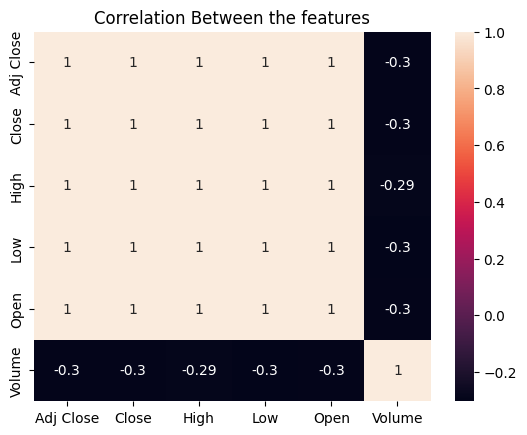

In [ ]:
sns.heatmap(new_data.corr(), annot=True)
plt.title('Correlation Between the features')

In [ ]:
plt.figure(figsize=(10, 7))
def plot_data(columns_1,column_2):
  l= [columns_1,column_2]
  for i in l:
      plt.subplots(1,1)
      new_data[str(i)].plot()
      plt.ylabel(i)
      plt.xlabel(None)
      plt.title(str(i) +" of AAPL")
  return plt.tight_layout()

<Figure size 1000x700 with 0 Axes>

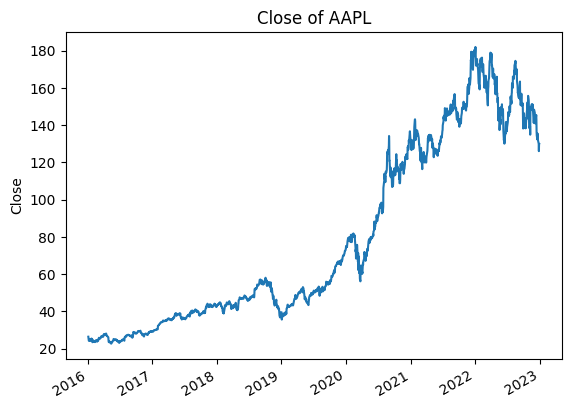

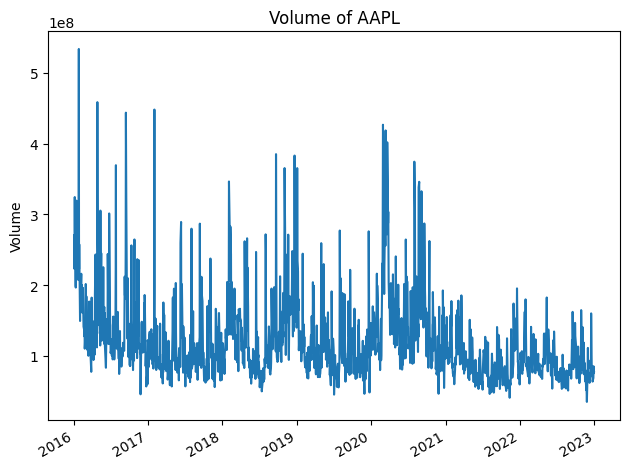

In [ ]:
plot_data("Close","Volume")

==> Negative Correlation ??




The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

<Axes: xlabel='Date'>

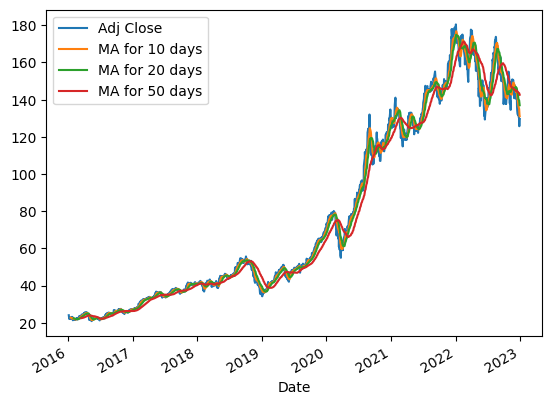

In [ ]:
ma_day = [10, 20,50]

for ma in ma_day:
      col = f"MA for {ma} days"
      new_data[col] = new_data['Adj Close'].rolling(ma).mean()


new_data[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot()


<Axes: xlabel='Date'>

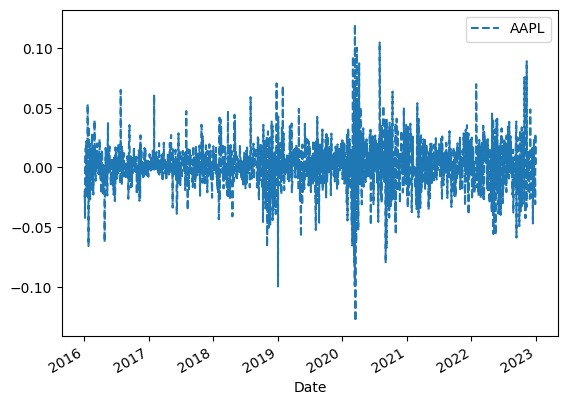

In [ ]:
new_returns.plot(legend=True, linestyle='--')

Text(0, 0.5, 'Counts')

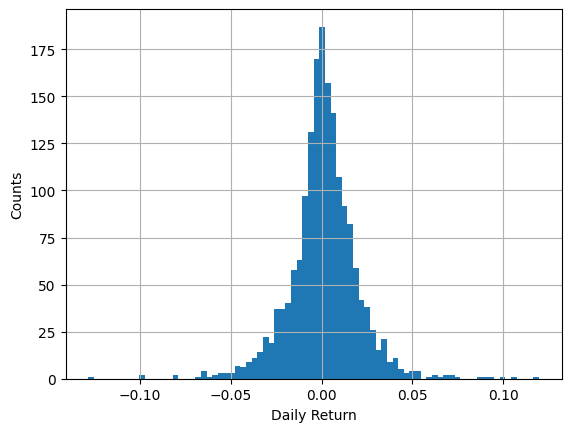

In [ ]:
new_returns.hist(bins=80)
plt.xlabel('Daily Return')
plt.ylabel('Counts')

### **Data Engineering**

* Normalization : MinMaxScaler
* Feature Selection : Pearson Correlation technique

In [ ]:
X = df_Stock.drop(columns=['Close'], axis=1)
y=new_prices
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

In [ ]:
X_train , X_test ,y_train, y_test= train_test_split(X_normalized, y,test_size=0.0025,random_state=40)

In [ ]:
len(X_test)

5

In [ ]:
model = LinearRegression()
model.fit(X_train , y_train)
y_pred=model.predict(X_test)

In [ ]:
mse = metrics.mean_squared_error(y_test,y_pred)
r2 = metrics.r2_score(y_test,y_pred)

In [ ]:
print("Mean squared Error for the LR : ",mse)
print("R-squared for the LR : ",r2)

Mean squared Error for the LR :  0.02625399088811341
R-squared for the LR :  0.9999885523569189


In [ ]:
def calculate_MAPE(y_true, y_pred):

    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
print("Training R-squared: ",round(metrics.r2_score(Y_train,Y_train_pred),2))
print("Training Explained Variation: ",round(metrics.explained_variance_score(Y_train,Y_train_pred),2))
print('Training MAPE:', round(get_mape(Y_train,Y_train_pred), 2))
print('Training Mean Squared Error:', round(metrics.mean_squared_error(Y_train,Y_train_pred), 2))
print("Training RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_train,Y_train_pred)),2))
print("Training MAE: ",round(metrics.mean_absolute_error(Y_train,Y_train_pred),2))

print(' ')

print("Validation R-squared: ",round(metrics.r2_score(Y_val,Y_val_pred),2))
print("Validation Explained Variation: ",round(metrics.explained_variance_score(Y_val,Y_val_pred),2))
print('Validation MAPE:', round(get_mape(Y_val,Y_val_pred), 2))
print('Validation Mean Squared Error:', round(metrics.mean_squared_error(Y_train,Y_train_pred), 2))
print("Validation RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_val,Y_val_pred)),2))
print("Validation MAE: ",round(metrics.mean_absolute_error(Y_val,Y_val_pred),2))

print(' ')

print("Test R-squared: ",round(metrics.r2_score(Y_test,Y_test_pred),2))
print("Test Explained Variation: ",round(metrics.explained_variance_score(Y_test,Y_test_pred),2))
print('Test MAPE:', round(get_mape(Y_test,Y_test_pred), 2))
print('Test Mean Squared Error:', round(metrics.mean_squared_error(Y_test,Y_test_pred), 2))
print("Test RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_test,Y_test_pred)),2))
print("Test MAE: ",round(metrics.mean_absolute_error(Y_test,Y_test_pred),2))

In [ ]:
df_pred = pd.DataFrame(Y_val.values, columns=['Actual'], index=Y_val.index)
df_pred['Predicted'] = Y_val_pred
df_pred = df_pred.reset_index()
df_pred.loc[:, 'Date'] = pd.to_datetime(df_pred['Date'],format='%Y-%m-%d')
df_pred

In [ ]:
df_pred[['Actual', 'Predicted']].plot()


In [ ]:
def create_train_test_set(df_Stock):

    features = df_Stock.drop(columns=['Close'], axis=1)
    target=new_prices
    scaler = MinMaxScaler()
    X_normalized = scaler.fit_transform(X)
    print('Historical Stock Data length is - ', str(len(new_data)))

    #create a chronological split for train and testing
    train_split = int(len(new_data) * 0.88)
    print('Training Set length - ', str(train_split))

    val_split = train_split + int(len(new_data) * 0.1)
    print('Validation Set length - ', str(int(len(new_data) * 0.1)))

    print('Test Set length - ', str(int(len(new_data) * 0.02)))

    # Splitting features and target into train, validation and test samples
    X_train, X_val, X_test = features[:train_split], features[train_split:val_split], features[val_split:]
    Y_train, Y_val, Y_test = target[:train_split], target[train_split:val_split], target[val_split:]

    #print shape of samples
    print(X_train.shape, X_val.shape, X_test.shape)
    print(Y_train.shape, Y_val.shape, Y_test.shape)

    return X_train, X_val, X_test, Y_train, Y_val, Y_test

In [ ]:
X_train , X_test ,y_train, y_test= create_train_test_set(new_data)

In [ ]:
model = LinearRegression()
model.fit(X_train , y_train)
y_pred=model.predict(X_test)

In [ ]:
mse = metrics.mean_squared_error(y_test,y_pred)
r2 = metrics.r2_score(y_test,y_pred)

In [ ]:
print("Mean squared Error for the LR : ",mse)
print("R-squared for the LR : ",r2)